In [2]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn import decomposition as dp
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("/home/hiroki/data/ml-latest-small/ratings.csv")
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [66]:
row = np.max(np.unique(df['userId']))

In [67]:
col = np.max(np.unique(df['movieId']))

In [68]:
print((row, col))

(610, 193609)


In [69]:
mat = sp.sparse.lil_matrix((row,col))
mat

<610x193609 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in LInked List format>

In [70]:
mat.shape

(610, 193609)

In [71]:
for u, m, r in zip(df['userId'], df['movieId'], df['rating']):
    mat[u-1,m-1]=r

In [72]:
mat = mat.tocsc()

In [73]:
res = []
for i in range(10,201,10):
    u, s, v_t = sp.sparse.linalg.svds(mat, k=i)
    mat_l = sp.sparse.csc_matrix(np.dot(u,np.diag(s)))
    mat_r = sp.sparse.csr_matrix(v_t)
    print(type(mat_l), type(mat_r))
    mat_hat = mat_l.dot(mat_r)
    res.append(np.sum((mat - mat_hat).multiply(mat - mat_hat)))

<class 'scipy.sparse.csc.csc_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csc.csc_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csc.csc_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csc.csc_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csc.csc_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csc.csc_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csc.csc_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csc.csc_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csc.csc_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csc.csc_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csc.csc_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csc.csc_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csc.csc_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
<class 'scip

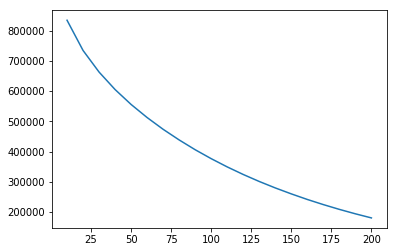

In [74]:
plt.plot(range(10,201,10), res)

In [78]:
n = len(df.index)
indexes = np.random.choice(range(n), 10, replace=False)
r_rows = df['userId'][indexes].values - 1
r_cols = df['movieId'][indexes].values - 1
Print(Indexes, r_rows, r_cols)
mat[r_rows][:,r_cols].todense()

[33624 42534 17298 44584 70932  8363 22352 62063 85526 80851] [226 287 110 297 452  56 150 410 554 509] [87231  2258  1484  1035  1551  2310  1072   271  1778   349]


matrix([[4.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 2. , 4. , 3. , 4. , 3. , 4. , 0. , 0. , 0. ],
        [0. , 0. , 3.5, 2. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [3.5, 0. , 0. , 3. , 0. , 0. , 0. , 0. , 2. , 0. ],
        [0. , 0. , 4. , 5. , 3. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 4. , 1. , 4. , 0. , 3. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 4. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 2. , 0. , 4. ],
        [0. , 4. , 0. , 4. , 0. , 0. , 0. , 0. , 3. , 0. ],
        [0. , 0. , 0. , 4. , 0. , 0. , 0. , 0. , 0. , 0.5]])

In [119]:
def SGD_decomp(mat, k, batch_size, iter_num, lamb, nu):
    row = mat.shape[0]
    col = mat.shape[1]
    U = (np.random.rand(row * k) - 0.5).reshape((row, k))
    V = (np.random.rand(col * k) - 0.5).reshape((col, k))
    for i in range(iter_num):
        indexes = np.random.choice(range(n), batch_size, replace=False)
        r_rows = df['userId'][indexes].values - 1
        r_cols = df['movieId'][indexes].values - 1
        d_mat = mat[r_rows][:,r_cols].todense()
        U_prev = U[r_rows, :]
        V_prev = V[r_cols, :]
        U_grad = - np.dot(d_mat, V_prev) + np.dot(U_prev,
                                                  (np.dot(V_prev.T, V_prev) + np.diag(lamb * np.ones(k))))
        V_grad = - np.dot(d_mat.T, U_prev) + np.dot(V_prev, 
                                                    (np.dot(U_prev.T, U_prev) + np.diag(lamb * np.ones(k))))
        U[r_rows, :] -= nu * U_grad
        V[r_cols, :] -= nu * V_grad
        
    return U, V

In [120]:
U, V = SGD_decomp(mat, 10, 20, 100, 10.0, 0.01)

In [121]:
np.sum(U)

-11.303566599612406

In [115]:
print(U)

[[        nan         nan         nan ...         nan         nan
          nan]
 [-1.13512738 -0.47918869 -1.4827663  ... -0.60424441 -0.32525095
   0.38771811]
 [ 0.43982663 -0.34281385  0.49975988 ... -1.84947301 -1.49000862
  -1.23129539]
 ...
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]]
